### Motor Vehicle Collisions in NYC, an exploration and regression analysis
### Authors: Jack Robbins & Daniyal Khan

In [2]:
# Important imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, ConfusionMatrixDisplay
from matplotlib.gridspec import GridSpec

In [3]:
# Read in our dataframe
collisions = pd.read_csv("data/Motor_Vehicle_Collisions_-_Crashes_20241116.csv")

/var/folders/8_/zfndr8r15_vc3pszv6xqbnnm0000gn/T/ipykernel_2730/3677595240.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  collisions = pd.read_csv("data/Motor_Vehicle_Collisions_-_Crashes_20241116.csv")


In [4]:
# Let's get an idea of our data
collisions.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN


In [5]:
# We can see that we have quit a few rows
collisions.shape

(2127188, 29)

## Data Preprocessing 

In [6]:
null_values=collisions.isnull().sum()
print("Detecting missing values:\n", null_values)

Detecting missing values:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           661545
ZIP CODE                          661805
LATITUDE                          238998
LONGITUDE                         238998
LOCATION                          238998
ON STREET NAME                    455507
CROSS STREET NAME                 810739
OFF STREET NAME                  1764054
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       7150
CONTRIBUTING FACTOR VEHICLE 2     333415
CONTRIBUTING FACTOR VEHICLE 3    1974243
CONTRIBUTING FACTOR VEHICLE 4    2092457
CONTRIBUTING FACTOR VEHICLE 5    2117737
COLLISION_ID                  

## Let's analyze these findings...
So we can see that there are a lot of missing values specifically for vehicles above code type 2. This is probably because there aren't that many 3, 4 or 5 car collisions in NYC. So instead of dropping rows where these are null, we may as well simply drop these columns. This also applies to the "CONTRIBUTING FACTOR VEHICLE.." columns for 3, 4 and 5. In fact, I am going to drop the rows where these aren't null, because I only care about one/two car collisions.

In [7]:
collisions.drop(['VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', \
                 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', \
                 'CONTRIBUTING FACTOR VEHICLE 5'], axis=1, inplace=True)

In [8]:
collisions.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,0,0,0,2,0,Aggressive Driving/Road Rage,Unspecified,4455765,Sedan,Sedan
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,0,0,0,1,0,Pavement Slippery,NaN,4513547,Sedan,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,0,0,0,0,0,Following Too Closely,Unspecified,4541903,Sedan,Pick-up Truck
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN


### Dropping NA's
Let's remove anything where the position or location of the crash was improperly recorded.

In [9]:
collisions.dropna(subset=['BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION'], how='any', inplace=True)

As we can see now, we should have borough and position data for every single crash

In [10]:
collisions

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,0,0,0,0,0,Unspecified,NaN,4456314,Sedan,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,0,0,0,0,0,NaN,NaN,4486609,NaN,NaN
7,12/14/2021,8:17,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,0,0,0,2,0,Unspecified,Unspecified,4486660,Sedan,Sedan
8,12/14/2021,21:10,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,0,0,0,0,0,Driver Inexperience,Unspecified,4487074,Sedan,NaN
9,12/14/2021,14:58,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,0,0,0,0,0,Passing Too Closely,Unspecified,4486519,Sedan,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127136,07/10/2024,18:34,BRONX,10454.0,40.812263,-73.920590,"(40.812263, -73.92059)",WILLIS AVENUE,EAST 143 STREET,NaN,...,0,0,0,0,0,Unspecified,NaN,4746499,Taxi,NaN
2127145,07/19/2024,18:00,BROOKLYN,11207.0,40.675735,-73.896860,"(40.675735, -73.89686)",ATLANTIC AVENUE,PENNSYLVANIA AVENUE,NaN,...,0,0,0,0,0,Turning Improperly,Unspecified,4746359,Sedan,Sedan
2127162,07/07/2024,14:12,BRONX,10468.0,40.861084,-73.911490,"(40.861084, -73.91149)",NaN,NaN,2258 HAMPDEN PLACE,...,0,0,0,0,0,Unspecified,NaN,4746320,Sedan,NaN
2127172,07/21/2024,18:05,BROOKLYN,11224.0,40.572968,-74.000595,"(40.572968, -74.000595)",NaN,NaN,3514 SURF AVENUE,...,0,0,0,0,0,Backing Unsafely,Unspecified,4746425,Station Wagon/Sport Utility Vehicle,Pick-up Truck


In [11]:
# Let's see how we're doing now...
null_values=collisions.isnull().sum()
print("Our null values now:\n", null_values)

Our null values now:
 CRASH DATE                             0
CRASH TIME                             0
BOROUGH                                0
ZIP CODE                               0
LATITUDE                               0
LONGITUDE                              0
LOCATION                               0
ON STREET NAME                    321239
CROSS STREET NAME                 321778
OFF STREET NAME                  1107450
NUMBER OF PERSONS INJURED             11
NUMBER OF PERSONS KILLED              23
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       5376
CONTRIBUTING FACTOR VEHICLE 2     236603
COLLISION_ID                           0
VEHICLE TYPE CODE 1                10403
VEHICLE TYPE CODE 2               290014
dtype: int64


## Removing unneeded columns
So we're definitely in a better spot now, but there is still much more that we can do. Firstly, we can see those "STREET NAME" columns have a lot of null values in them. Since the name of the street is too atomic to be useful for our regression equation, we can just get rid of those columns entirely. We can also see that every crash has a unique crash ID given to it by the NYPD. Again, this won't help us all with regression, so we'll scrap it as well. Finally, the contributing factor column is not a standardized categorical column. The data in there are manually entered strings that would also not be of much use to us. Additionally, the crash date itself may be a pain to work with, and I don't foresee it coming up much for us. Location and zip code are other strange columns, as they are just proxies for latitude and longitude.

In [12]:
# Drop all of these columns in here
collisions.drop(['ON STREET NAME', 'LOCATION','CROSS STREET NAME', 'OFF STREET NAME', 'COLLISION_ID', \
                 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CRASH DATE', 'ZIP CODE'], axis=1, inplace=True)

In [13]:
# Let's see how we're doing now...
null_values=collisions.isnull().sum()
print("Our null values now:\n", null_values)

Our null values now:
 CRASH TIME                            0
BOROUGH                               0
LATITUDE                              0
LONGITUDE                             0
NUMBER OF PERSONS INJURED            11
NUMBER OF PERSONS KILLED             23
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
VEHICLE TYPE CODE 1               10403
VEHICLE TYPE CODE 2              290014
dtype: int64


## Dropping NA's in the remaining rows/columns
We're doing much better now. We still have around 250,000 columns with at least one NA. For our purposes here, since we have around 2 million rows, we can acceptably lose that data, so we'll now drop any rows with an NA

In [14]:
collisions.dropna(how='any', axis=0, inplace=True)

In [15]:
# Let's see how we're doing now...
null_values=collisions.isnull().sum()
print("Our null values now:\n", null_values)

Our null values now:
 CRASH TIME                       0
BOROUGH                          0
LATITUDE                         0
LONGITUDE                        0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
dtype: int64


In [16]:
# Let's see what how much we still have left over
collisions.shape

(1138114, 14)

### Dealing with time and type mismatches

Even though the data is cleaned from NA's, we still can't use it. Our dataset is still filled with categorical data that we'll need to encode numerically if we want to do any correlation analysis or regression on it.

In [17]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138114 entries, 7 to 2127172
Data columns (total 14 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH TIME                     1138114 non-null  object 
 1   BOROUGH                        1138114 non-null  object 
 2   LATITUDE                       1138114 non-null  float64
 3   LONGITUDE                      1138114 non-null  float64
 4   NUMBER OF PERSONS INJURED      1138114 non-null  float64
 5   NUMBER OF PERSONS KILLED       1138114 non-null  float64
 6   NUMBER OF PEDESTRIANS INJURED  1138114 non-null  int64  
 7   NUMBER OF PEDESTRIANS KILLED   1138114 non-null  int64  
 8   NUMBER OF CYCLIST INJURED      1138114 non-null  int64  
 9   NUMBER OF CYCLIST KILLED       1138114 non-null  int64  
 10  NUMBER OF MOTORIST INJURED     1138114 non-null  int64  
 11  NUMBER OF MOTORIST KILLED      1138114 non-null  int64  
 12  VEHICLE TYPE CODE 1

As we can see, there are several columns that are Objects(really strings) that we'll need to encode. A special case though is the crash date and crash time. We can convert crash time specifically into an integer representing the number of minutes since midnight by doing hours*60 + minutes. We'll use the help of a custom function for this.

In [18]:
def clock_time_to_minutes(clock_time):
    #Split the clock time along the colon
    split = clock_time.split(":")
    return int(split[1])*60 + int(split[0])

#Apply this to the CRASH TIME
collisions['CRASH TIME'] = collisions['CRASH TIME'].apply(clock_time_to_minutes)
    

In [19]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138114 entries, 7 to 2127172
Data columns (total 14 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH TIME                     1138114 non-null  int64  
 1   BOROUGH                        1138114 non-null  object 
 2   LATITUDE                       1138114 non-null  float64
 3   LONGITUDE                      1138114 non-null  float64
 4   NUMBER OF PERSONS INJURED      1138114 non-null  float64
 5   NUMBER OF PERSONS KILLED       1138114 non-null  float64
 6   NUMBER OF PEDESTRIANS INJURED  1138114 non-null  int64  
 7   NUMBER OF PEDESTRIANS KILLED   1138114 non-null  int64  
 8   NUMBER OF CYCLIST INJURED      1138114 non-null  int64  
 9   NUMBER OF CYCLIST KILLED       1138114 non-null  int64  
 10  NUMBER OF MOTORIST INJURED     1138114 non-null  int64  
 11  NUMBER OF MOTORIST KILLED      1138114 non-null  int64  
 12  VEHICLE TYPE CODE 1

We can also see that Number of persons injured/killed is a float. Since we can't have fractional parts of people, we'll convert these into ints.

In [20]:
collisions['NUMBER OF PERSONS INJURED'] = collisions['NUMBER OF PERSONS INJURED'].apply(lambda x: int(x))
collisions['NUMBER OF PERSONS KILLED'] = collisions['NUMBER OF PERSONS KILLED'].apply(lambda x: int(x))

In [21]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138114 entries, 7 to 2127172
Data columns (total 14 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH TIME                     1138114 non-null  int64  
 1   BOROUGH                        1138114 non-null  object 
 2   LATITUDE                       1138114 non-null  float64
 3   LONGITUDE                      1138114 non-null  float64
 4   NUMBER OF PERSONS INJURED      1138114 non-null  int64  
 5   NUMBER OF PERSONS KILLED       1138114 non-null  int64  
 6   NUMBER OF PEDESTRIANS INJURED  1138114 non-null  int64  
 7   NUMBER OF PEDESTRIANS KILLED   1138114 non-null  int64  
 8   NUMBER OF CYCLIST INJURED      1138114 non-null  int64  
 9   NUMBER OF CYCLIST KILLED       1138114 non-null  int64  
 10  NUMBER OF MOTORIST INJURED     1138114 non-null  int64  
 11  NUMBER OF MOTORIST KILLED      1138114 non-null  int64  
 12  VEHICLE TYPE CODE 1

### Encoding Categorical Data
We're almost there, but we still have 3 categorical data columns in the VEHICLE TYPE CODE columns and BOROUGH columns. We will use label encoding to assign these all corresponding numerical values.

In [22]:
borough_le = preprocessing.LabelEncoder()
# Note that we want to use the same label encoder for both type code sets
typecode_le = preprocessing.LabelEncoder()

collisions['BOROUGH'] = borough_le.fit_transform(collisions['BOROUGH'])
typecode_le.fit(collisions['VEHICLE TYPE CODE 1'].values.tolist() + collisions['VEHICLE TYPE CODE 2'].values.tolist())
collisions['VEHICLE TYPE CODE 1'] = typecode_le.transform(collisions['VEHICLE TYPE CODE 1'])
collisions['VEHICLE TYPE CODE 2'] = typecode_le.transform(collisions['VEHICLE TYPE CODE 2'])

In [23]:
collisions

,CRASH TIME,BOROUGH,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
7,1028,0,40.868160,-73.831480,2,0,0,0,0,0,2,0,1277,1277
9,3494,2,40.751440,-73.973970,0,0,0,0,0,0,0,0,1277,1306
11,3016,3,40.675884,-73.755770,0,0,0,0,0,0,0,0,1277,1306
14,623,3,40.666840,-73.789410,2,0,0,0,0,0,2,0,1277,1277
15,3497,1,40.681580,-73.974630,0,0,0,0,0,0,0,0,1375,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127107,12,1,40.685658,-73.985695,1,0,0,0,1,0,0,0,1306,174
2127110,323,2,40.749130,-73.988240,1,0,0,0,1,0,0,0,174,1306
2127114,2709,3,40.684383,-73.790180,4,0,0,0,0,0,4,0,1277,1306
2127145,18,1,40.675735,-73.896860,0,0,0,0,0,0,0,0,1277,1277


Great, we've still got about 1.1 million rows of clean, null-free data remaining for us to play around with. We can now move on to searching for correlations in the dataset.

## Data Visualization - Hunting for correlations & patterns

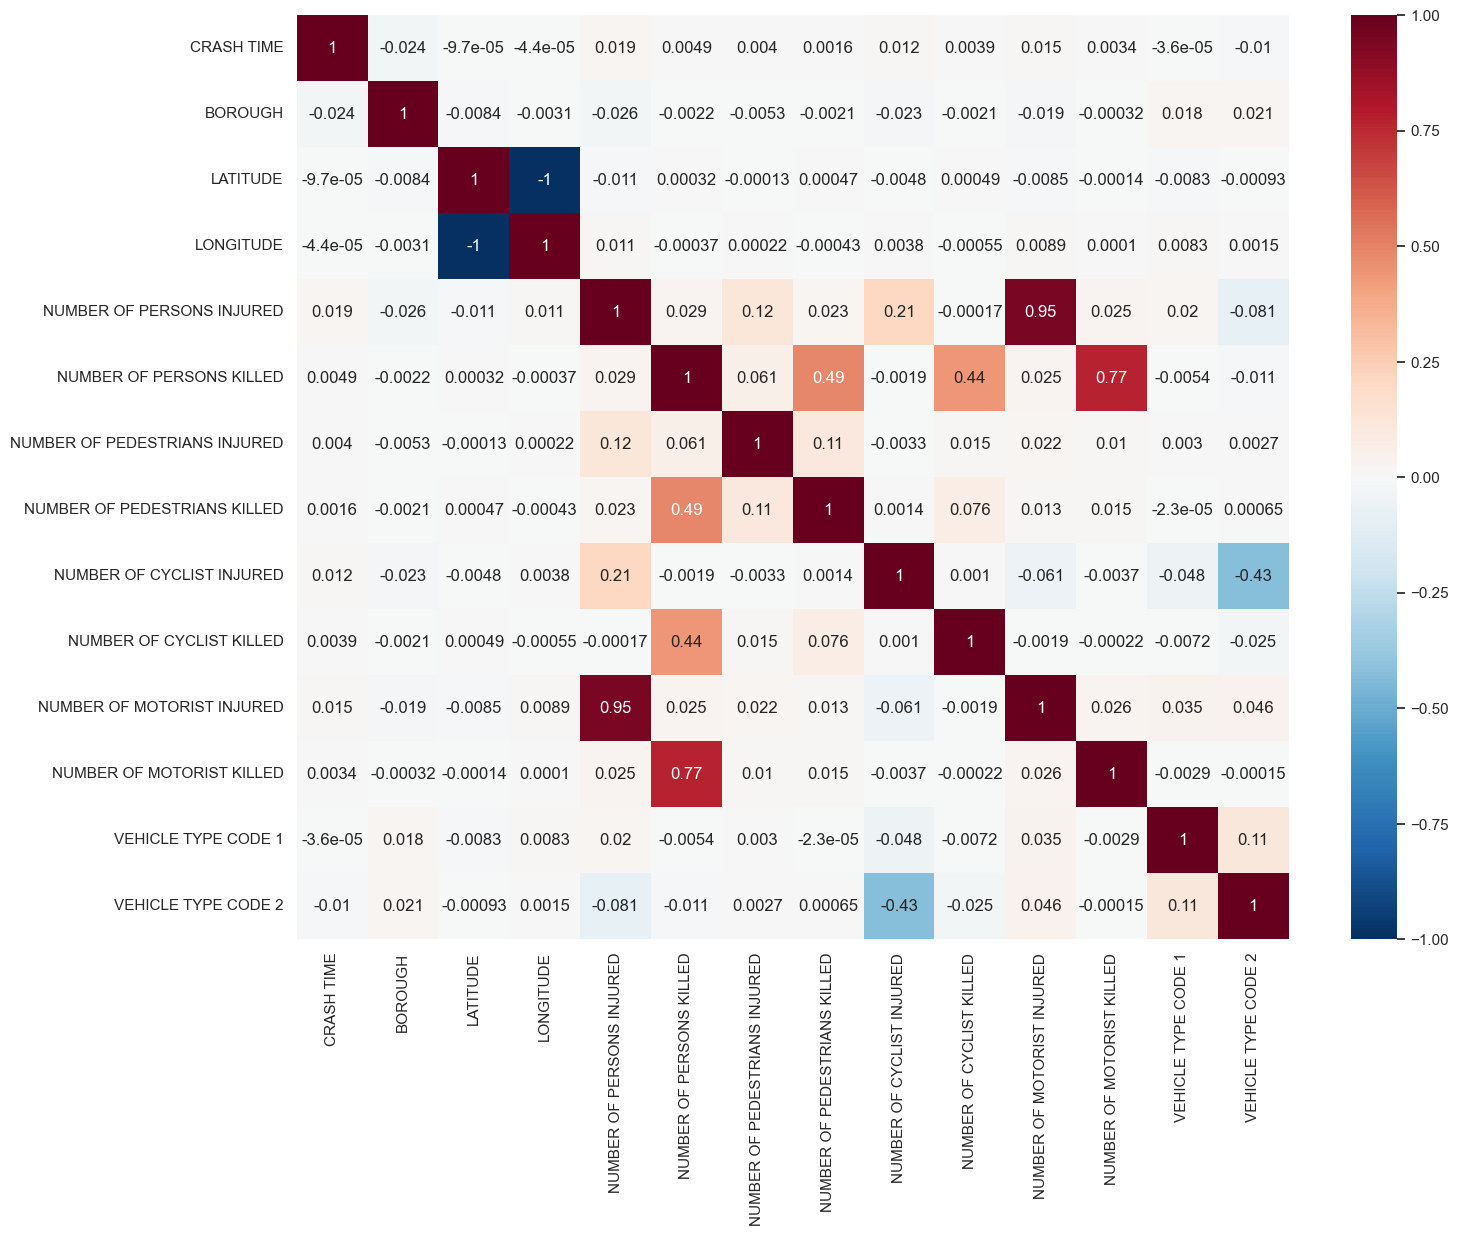

In [24]:
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = collisions.corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

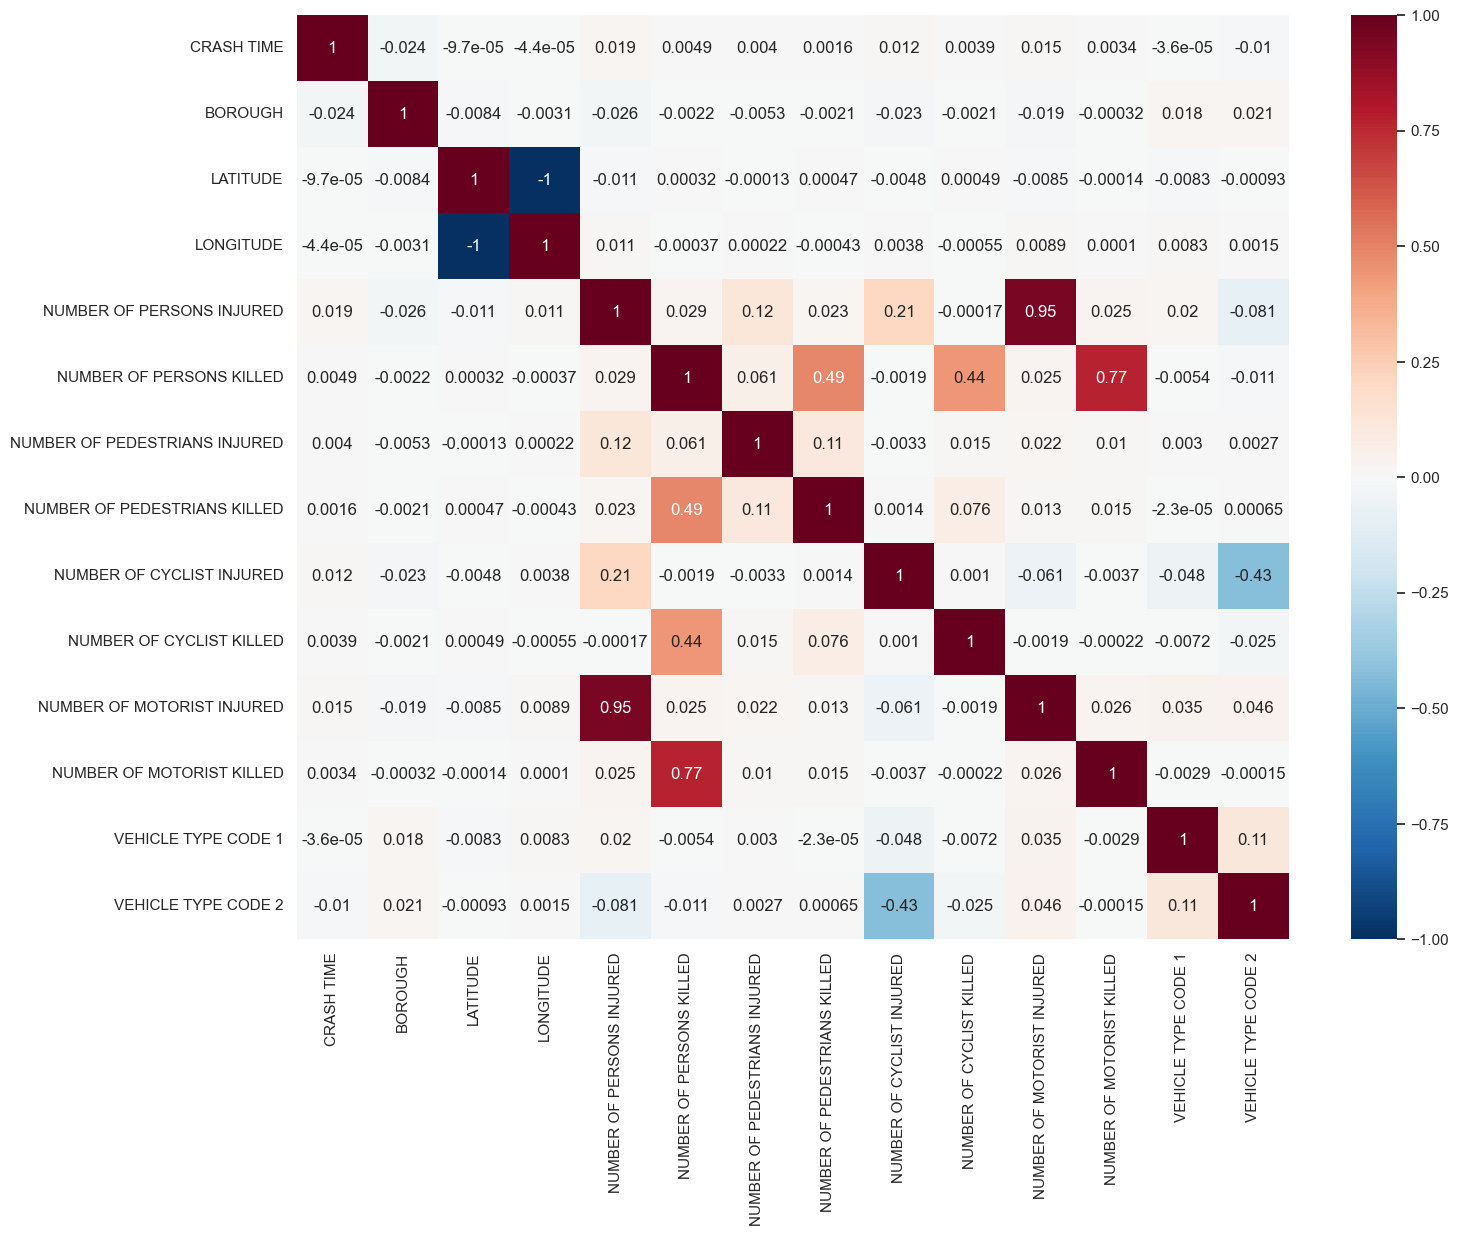

In [25]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = collisions.corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

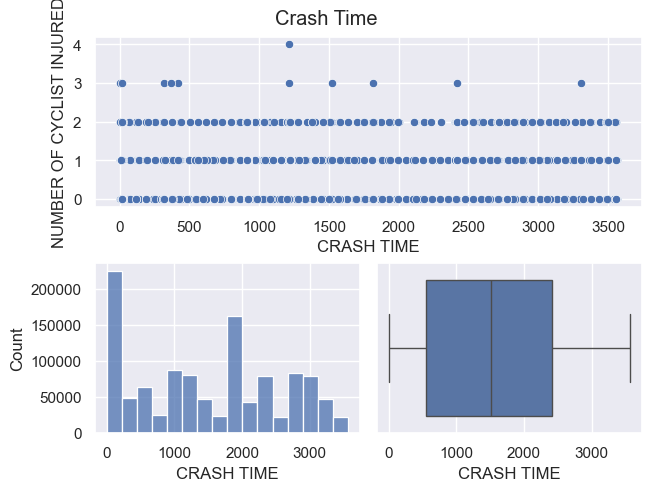

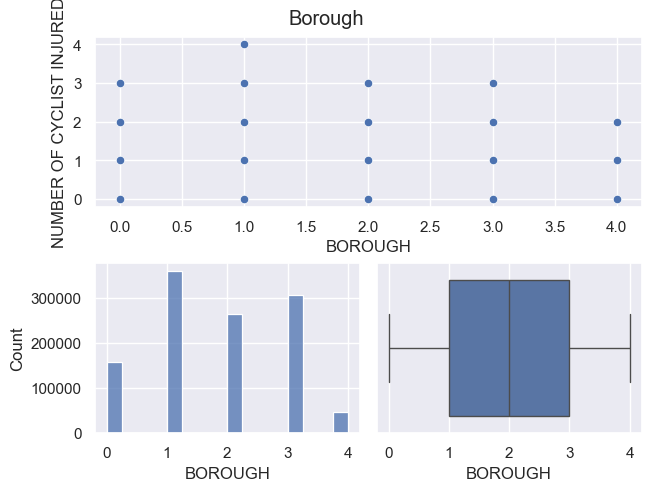

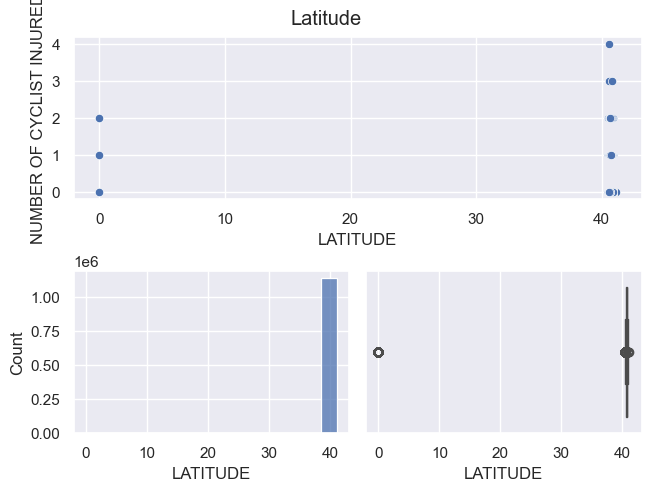

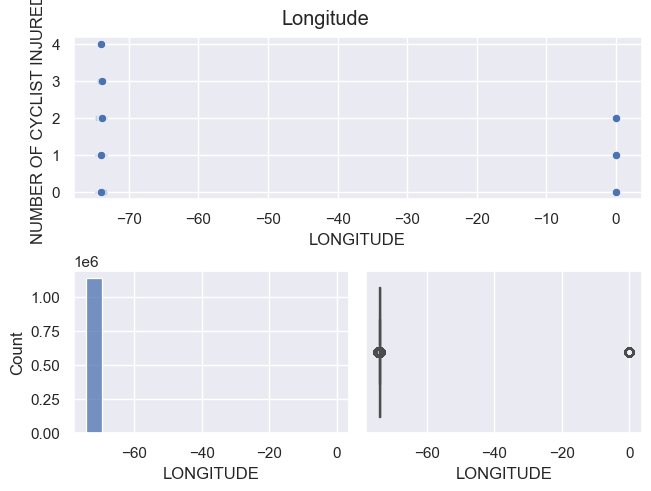

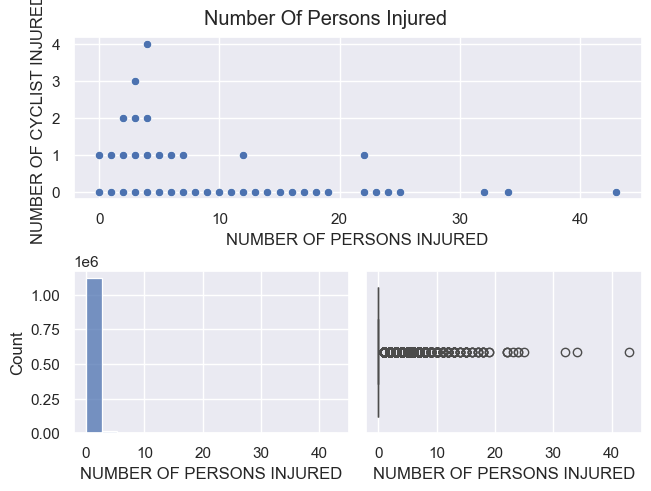

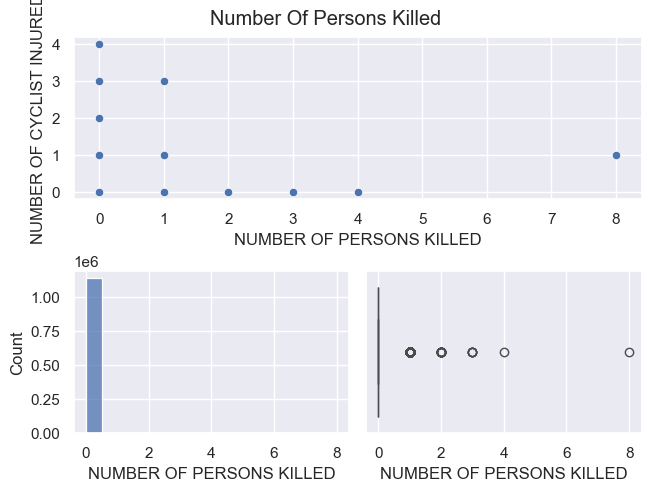

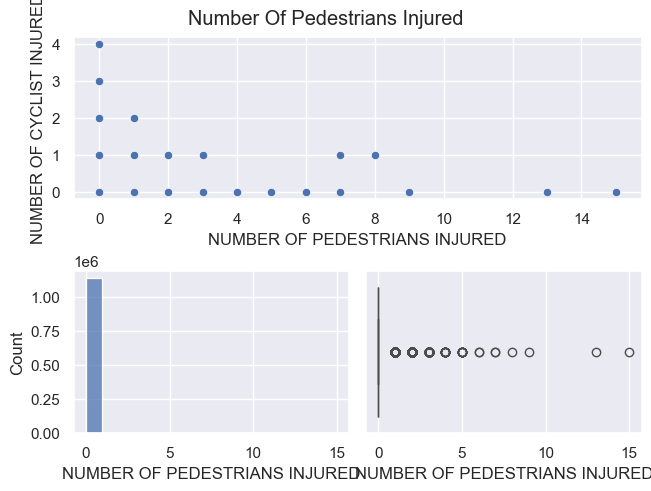

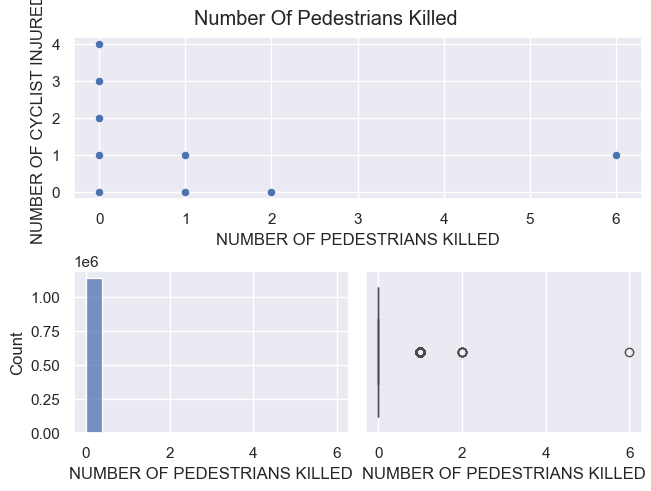

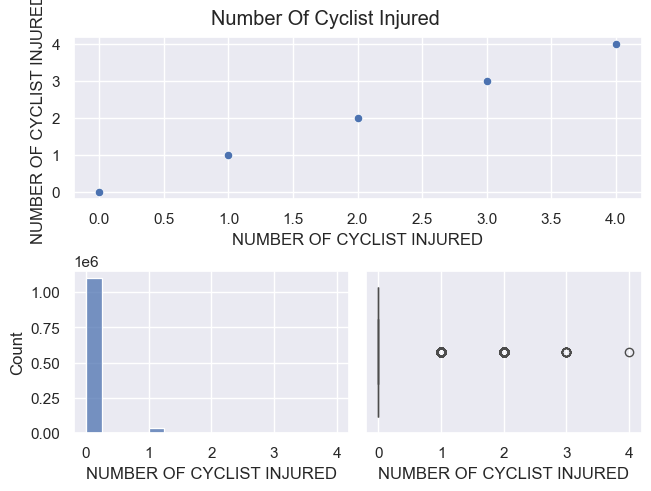

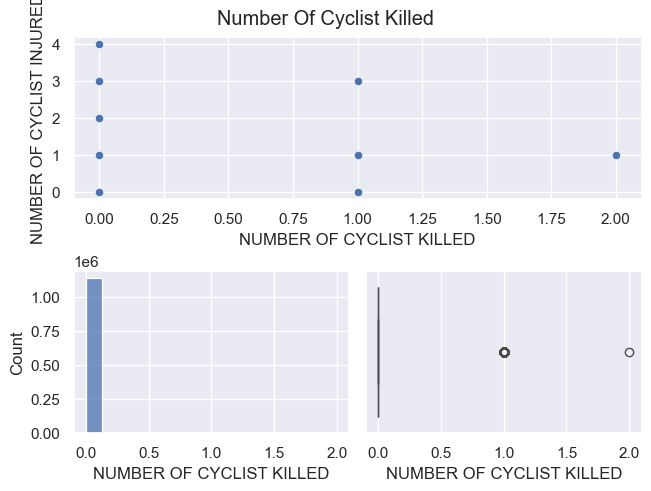

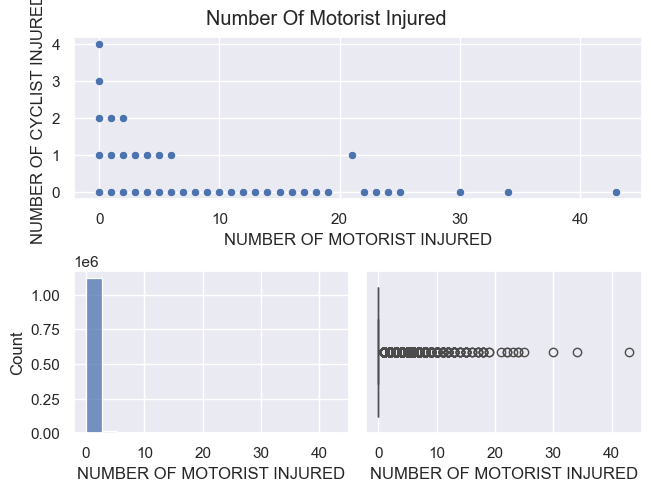

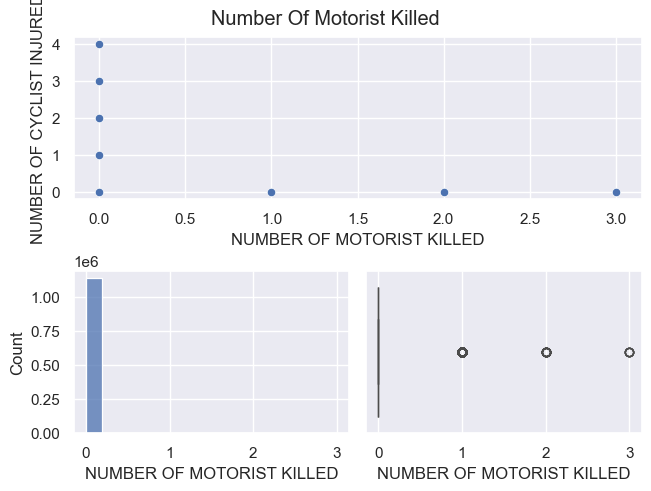

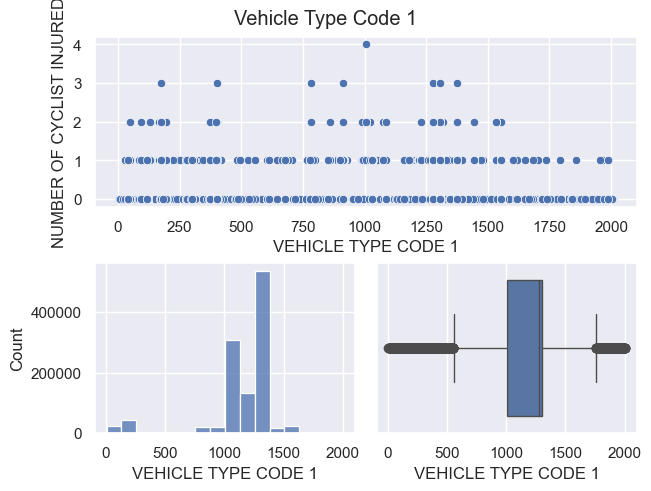

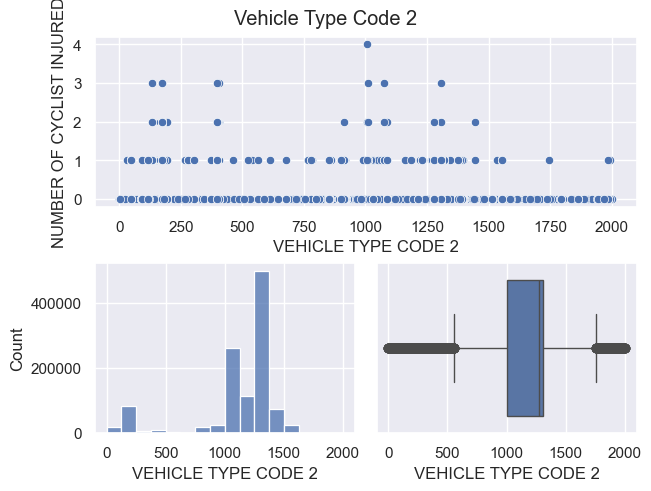

In [26]:
columns = collisions.columns
for idx in range(len(columns)):
    x_value = columns[idx]
    t_value = columns[idx].title()
    fig = plt.figure(constrained_layout=True)
    gs = GridSpec(2, 2, figure=fig)
    # create sub plots as grid
    ax1 = fig.add_subplot(gs[0, :])
    sns.scatterplot(data=collisions,x=x_value, y='NUMBER OF CYCLIST INJURED')
    ax2 = fig.add_subplot(gs[1, 0])
    sns.histplot(x=x_value,data=collisions,bins=16)
    ax3 = fig.add_subplot(gs[1, 1])
    sns.boxplot(data=collisions,x=x_value,orient='h')
 
    # depict illustration
    fig.suptitle(t_value)
    #fig.savefig('data/graphs/' + x_value + '.png', format='png')
    print('\n')

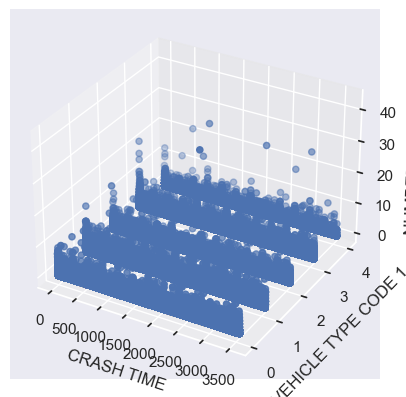

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = collisions['CRASH TIME']
y = collisions['BOROUGH']
z = collisions['NUMBER OF PERSONS INJURED']

ax.set_xlabel("CRASH TIME")
ax.set_ylabel("VEHICLE TYPE CODE 1")
ax.set_zlabel("NUMBER INJURED")

ax.scatter(x, y, z)

### Let's now train the KNN model and evaluate results

In [28]:
# Let's now split the data up
X = collisions[['CRASH TIME','BOROUGH','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2']]
y = collisions[['NUMBER OF PERSONS INJURED']].to_numpy().flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [37]:
# Let's train a decision tree model on this
knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [38]:
# Let's see how we did
y_pred = knn.predict(X_test)
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
# Precision 
precision = precision_score(y_test, y_pred,average='weighted', zero_division=0.0) 
# Recall 
recall = recall_score(y_test, y_pred,average='weighted', zero_division=0.0) 
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy of our Decision Tree Model:{accuracy: .3f}')
print(f'Precision of our Decision Tree Model:{precision: .3f}')
print(f'Recall of our Decision Tree Model:{recall: .3f}')
print(f'F1 score of our Decision Tree Model:{f1: .3f}')

Accuracy of our Decision Tree Model: 0.836
Precision of our Decision Tree Model: 0.781
Recall of our Decision Tree Model: 0.836
F1 score of our Decision Tree Model: 0.792


In [39]:
cm = confusion_matrix(y_test, y_pred)

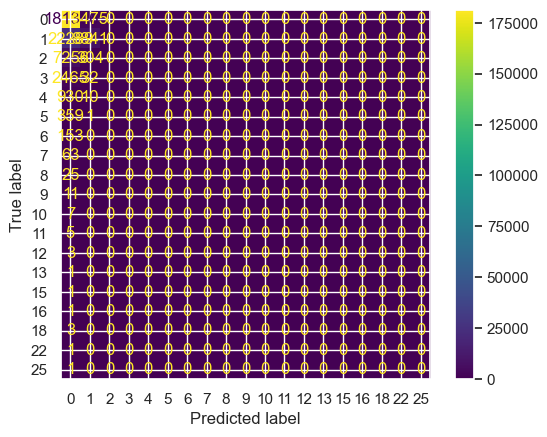

In [40]:
cm_disp = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()